In [ ]:
from impedance import preprocessing

In [ ]:
frequencies, Z = preprocessing.readCSV('./Impedance_Data.csv')

In [ ]:
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [ ]:
# here we are assuming that we know the correct circuit model and are estimating the parameters
from impedance.models.circuits import CustomCircuit
import numpy as np

circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)'
initial_guess_list = [.1, .1, 100, .1, .05, 100, 1]
initial_guess = np.array(initial_guess_list)

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

In [ ]:
circuit.fit(frequencies, Z)

In [ ]:
circuit.parameters_

array([1.66668518e+04, 3.38007761e+06, 5.90301221e+03, 2.08576331e+05,
       4.22230800e+03, 4.56744267e-03, 4.40305134e-07])

In [ ]:
# for prediction of impedances using the .predict() method on the frequencies
Z_fit = circuit.predict(frequencies)

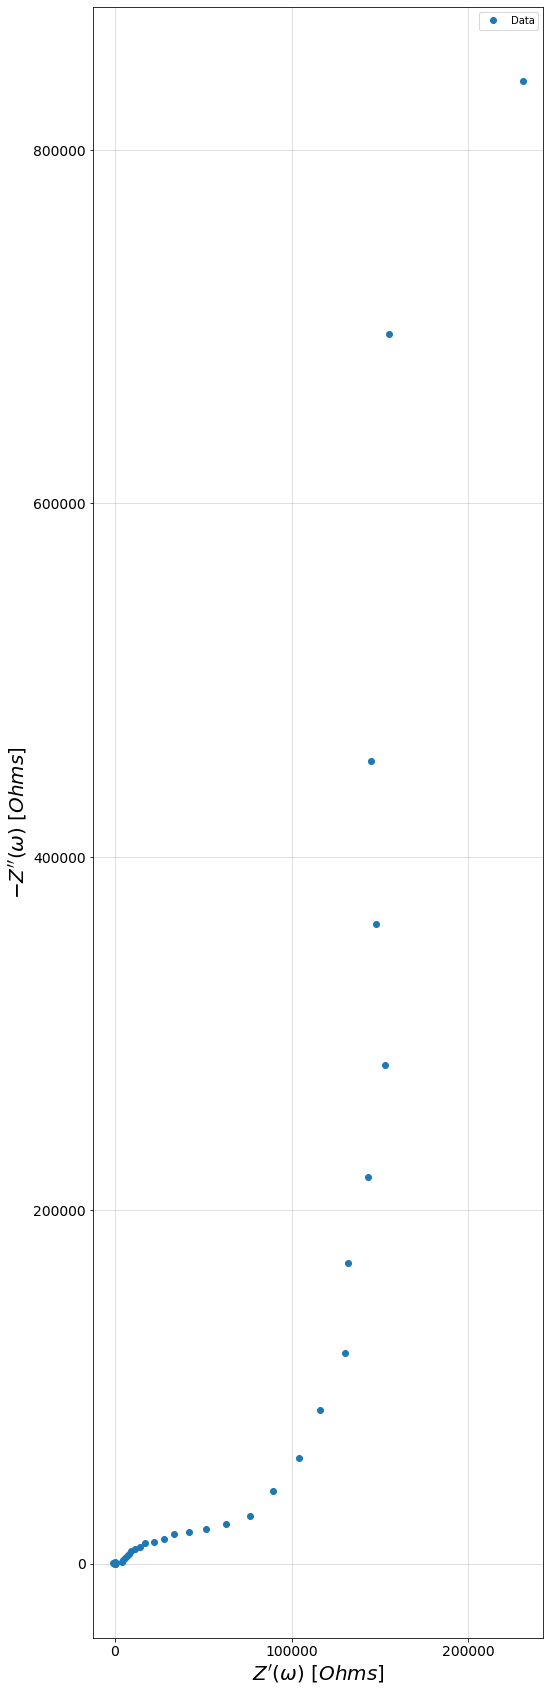

In [ ]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(ax, Z, fmt='o')
# plot_nyquist(ax, Z_fit, fmt='-')
fig_size = plt.rcParams["figure.figsize"]

plt.legend(['Data', 'Fit'])
fig_size[0] = 30               
fig_size[1] = 30
plt.show()